In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 7.1 处理缺失数据
缺失数据在pandas中呈现的方式有些不完美，但对于大多数用户可以保证功能正
常。对于数值数据，pandas使用浮点值NaN（Not a Number）表示缺失数据。
我们称其为哨兵值，可以方便的检测出来

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

在pandas中，我们采用了R语言中的惯用法，即将缺失值表示为NA，它表示不可
用not available。在统计应用中，NA数据可能是不存在的数据或者虽然存在，但
是没有观察到（例如，数据采集中发生了问题）。当进行数据清洗以进行分析时，
最好直接对缺失数据进行分析，以判断数据采集的问题或缺失数据可能导致的偏
差。
- Python内置的None值在对象数组中也可以作为NA

In [3]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

处理缺失值得函数方法
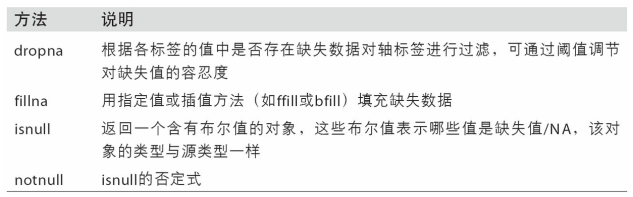

## 滤除缺失数据
过滤掉缺失数据的办法有很多种。你可以通过pandas.isnull或布尔索引的手工方
法，
- 但dropna可能会更实用一些。对于一个Series，dropna返回一个仅含非空数
据和索引值的Series

In [4]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [5]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

- 于DataFrame对象，事情就有点复杂了。你可能希望丢弃全NA或含有NA的
行或列。dropna默认丢弃任何含有缺失值的行

In [6]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


- 传入how='all'将只丢弃全为NA的那些行

In [7]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [8]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [9]:
data.dropna(axis=1,how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


- 另一个滤除DataFrame行的问题涉及时间序列数据。假设你只想留下一部分观测
数据，可以用thresh参数实现此目的

In [10]:
df = pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,0.098280,-0.513540,0.303199
1,0.735814,1.201531,0.548712
2,-0.697106,-0.333297,0.419340
3,1.416633,0.525470,-1.534877
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


In [11]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.098280,NaN,NaN
1,0.735814,NaN,NaN
2,-0.697106,NaN,0.419340
3,1.416633,NaN,-1.534877
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


In [12]:
df.dropna()

,0,1,2
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


### -  填充缺失数据

- 你可能不想滤除缺失数据（有可能会丢弃跟它有关的其他数据），而是希望通过其
他方式填补那些“空洞”。对于大多数情况而言，fillna方法是最主要的函数。通
过一个常数调用fillna就会将缺失值替换为那个常数值

In [13]:
df.fillna(0)

,0,1,2
0,0.098280,0.000000,0.000000
1,0.735814,0.000000,0.000000
2,-0.697106,0.000000,0.419340
3,1.416633,0.000000,-1.534877
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


- 若是通过一个字典调用fillna，就可以实现对不同的列填充不同的值：

In [14]:
df.fillna({1:0.5, 2: 0})

,0,1,2
0,0.098280,0.500000,0.000000
1,0.735814,0.500000,0.000000
2,-0.697106,0.500000,0.419340
3,1.416633,0.500000,-1.534877
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


- fillna 默认会返回新对象，但也可以使用inplace对现有对象进行就地修改。

In [15]:
_ = df.fillna(0,inplace=True)
df

,0,1,2
0,0.098280,0.000000,0.000000
1,0.735814,0.000000,0.000000
2,-0.697106,0.000000,0.419340
3,1.416633,0.000000,-1.534877
4,-0.401673,0.878562,-0.118448
5,-0.235415,2.185732,-0.299136
6,0.907488,-0.085368,0.525700


- 对reindexing有效的那些插值方法也可用于fillna：

In [16]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.504616,2.229464,0.535131
1,0.691234,-0.506967,-0.301581
2,2.231664,NaN,-0.094985
3,0.573701,NaN,0.448797
4,-0.172767,NaN,NaN
5,0.089739,NaN,NaN


In [17]:
df.fillna(method='ffill')

,0,1,2
0,-0.504616,2.229464,0.535131
1,0.691234,-0.506967,-0.301581
2,2.231664,-0.506967,-0.094985
3,0.573701,-0.506967,0.448797
4,-0.172767,-0.506967,0.448797
5,0.089739,-0.506967,0.448797


In [18]:
df.fillna(method='ffill',limit=2)

,0,1,2
0,-0.504616,2.229464,0.535131
1,0.691234,-0.506967,-0.301581
2,2.231664,-0.506967,-0.094985
3,0.573701,-0.506967,0.448797
4,-0.172767,NaN,0.448797
5,0.089739,NaN,0.448797


- 可以传入
Series的平均值或中位数

In [19]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

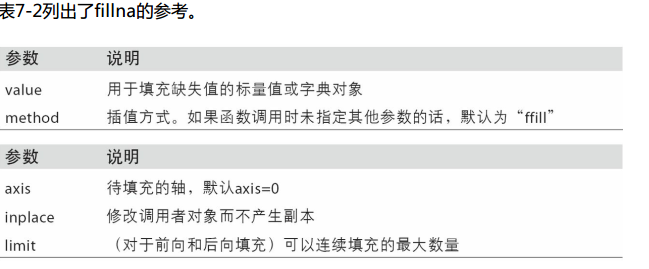

# 7.2 数据转换
本章到目前为止介绍的都是数据的重排。另一类重要操作则是过滤、清理以及其他
的转换工作。
## 移除重复数据

In [20]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


- DataFrame的duplicated方法返回一个布尔型Series，表示各行是否是重复行
（前面出现过的行）：

In [22]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

- 还有一个与此相关的drop_duplicates方法，它会返回一个DataFrame，重复的数
组会标为False

In [23]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


- 这两个方法默认会判断全部列，你也可以指定部分列进行重复项判断。假设我们还
有一列值，且只希望根据k1列过滤重复项

In [25]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [26]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


- duplicated和drop_duplicates默认保留的是第一个出现的值组合。传入
keep='last'则保留最后一个

In [28]:
data.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## 利用函数或映射进行数据转换
对于许多数据集，你可能希望根据数组、Series或DataFrame列中的值来实现转换
工作。我们来看看下面这组有关肉类的数据

In [29]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


假设你想要添加一列表示该肉类食物来源的动物类型。我们先编写一个不同肉类到
动物的映射：

In [30]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

- Series的map方法可以接受一个函数或含有映射关系的字典型对象，
- 但是这里有一个小问题，即有些肉类的首字母大写了，而另一些则没有。因此，我们还需要使用
Series的str.lower方法，将各个值转换为小写

In [31]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [32]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


- 我们也可以传入一个能够完成全部这些工作的函数：

In [33]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## 替换值

- 利用fillna方法填充缺失数据可以看做值替换的一种特殊情况。
- 前面已经看到，map可用于修改对象的数据子集，
- 而replace则提供了一种实现该功能的更简单、更灵活的方式。

In [34]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

- -999这个值可能是一个表示缺失数据的标记值。要将其替换为pandas能够理解的
NA值，我们可以利用replace来产生一个新的Series（除非传入
inplace=True）

In [36]:
data.replace(-999,NA)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

- 如果你希望一次性替换多个值，可以传入一个由待替换值组成的列表以及一个替换
值

In [37]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

- 要让每个值有不同的替换值，可以传递一个替换列表：

In [38]:
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

- 传入的参数也可以是字典：

In [40]:
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

笔记：data.replace方法与data.str.replace不同，后者做的是字符串的元素级
替换。

## 重命名轴索引
跟Series中的值一样，轴标签也可以通过函数或映射进行转换，从而得到一个新的
不同标签的对象。轴还可以被就地修改，而无需新建一个数据结构。

In [41]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [43]:
transform = lambda x:x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [44]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


- 如果想要创建数据集的转换版（而不是修改原始数据），比较实用的方法是
rename：

In [45]:
data.rename(index = str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


- 特别说明一下，rename可以结合字典型对象实现对部分轴标签的更新：

In [46]:
data.rename(index={'OHIO':'INDIANA'},columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


- rename可以实现复制DataFrame并对其索引和列标签进行赋值。如果希望就地修
改某个数据集，传入inplace=True即可：

In [47]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## 离散化和面元划分
- 为了便于分析，连续数据常常被离散化或拆分为“面元”（bin）。假设有一组人
员数据，而你希望将它们划分为不同的年龄组

In [48]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

- 接下来将这些数据划分为“18到25”、“26到35”、“35到60”以及“60以
上”几个面元。要实现该功能，你需要使用pandas的cut函数

In [51]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

- pandas返回的是一个特殊的Categorical对象。结果展示了pandas.cut划分的面
元。你可以将其看做一组表示面元名称的字符串。它的底层含有一个表示不同分类
名称的类型数组，以及一个codes属性中的年龄数据的标签

In [53]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [54]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [55]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

- pd.value_counts(cats)是pandas.cut结果的面元计数。
- 跟“区间”的数学符号一样，圆括号表示开端，而方括号则表示闭端（包括）。
- 哪边是闭端可以通过right=False进行修改

In [56]:
pd.cut(ages,[18,26,36,61,100],right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

- 可 以通过传递一个列表或数组到labels，设置自己的面元名称

In [57]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages,bins,labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

- 如果向cut传入的是面元的数量而不是确切的面元边界，则它会根据数据的最小值
和最大值计算等长面元。下面这个例子中，我们将一些均匀分布的数据分成四组：

In [58]:
data = np.random.rand(20)
pd.cut(data,4,precision=2) #均价分成4份，精度为小数点后两位

[(0.022, 0.27], (0.51, 0.75], (0.51, 0.75], (0.27, 0.51], (0.27, 0.51], ..., (0.022, 0.27], (0.27, 0.51], (0.022, 0.27], (0.75, 1.0], (0.51, 0.75]]
Length: 20
Categories (4, interval[float64]): [(0.022, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 1.0]]

- qcut是一个非常类似于cut的函数，它可以根据样本分位数对数据进行面元划分。
- 根据数据的分布情况，cut可能无法使各个面元中含有相同数量的数据点。
- 而qcut由于使用的是样本分位数，因此可以得到大小基本相等的面元：

In [63]:
data = np.random.randn(1000)
cats = pd.qcut(data,4)
cats

[(0.0425, 0.753], (0.753, 2.908], (-2.824, -0.63], (-0.63, 0.0425], (-2.824, -0.63], ..., (0.0425, 0.753], (-2.824, -0.63], (-0.63, 0.0425], (-2.824, -0.63], (0.753, 2.908]]
Length: 1000
Categories (4, interval[float64]): [(-2.824, -0.63] < (-0.63, 0.0425] < (0.0425, 0.753] < (0.753, 2.908]]

In [64]:
pd.value_counts(cats)

(0.753, 2.908]     250
(0.0425, 0.753]    250
(-0.63, 0.0425]    250
(-2.824, -0.63]    250
dtype: int64

- 与cut类似，你也可以传递自定义的分位数（0到1之间的数值，包含端点）

In [68]:
cats1 = pd.qcut(data, [0, 0.3, 0.7, 0.9, 1.])
cats1

[(-0.496, 0.561], (0.561, 1.364], (-2.824, -0.496], (-2.824, -0.496], (-2.824, -0.496], ..., (-0.496, 0.561], (-2.824, -0.496], (-0.496, 0.561], (-2.824, -0.496], (0.561, 1.364]]
Length: 1000
Categories (4, interval[float64]): [(-2.824, -0.496] < (-0.496, 0.561] < (0.561, 1.364] < (1.364, 2.908]]

In [69]:
pd.value_counts(cats1)

(-0.496, 0.561]     400
(-2.824, -0.496]    300
(0.561, 1.364]      200
(1.364, 2.908]      100
dtype: int64

## 检测和过滤异常值
- 过滤或变换异常值（outlier）在很大程度上就是运用数组运算。来看一个含有正
态分布数据的DataFrame

In [70]:
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.016864,-0.028419,0.019668,0.050966
std,1.008666,0.984742,0.950696,1.026418
min,-3.472250,-3.427266,-3.263068,-2.966922
25%,-0.685299,-0.699219,-0.618258,-0.666501
50%,-0.003783,-0.054025,0.004031,0.023822
75%,0.665737,0.635464,0.645546,0.760034
max,3.085329,3.330484,3.040389,3.284172


- 找出某列中绝对值大小超过3的值

In [72]:
data[1][np.abs(data[1])>3]

106   -3.427266
135   -3.341555
170    3.053204
513    3.330484
790   -3.109837
917   -3.158797
Name: 1, dtype: float64

In [73]:
data[2][np.abs(data[2])>3]

660   -3.263068
796    3.040389
Name: 2, dtype: float64

- 要选出全部含有“超过3或－3的值”的行，你可以在布尔型DataFrame中使用any
方法

In [77]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
86,3.085329,-1.310384,-1.541206,-0.704612
89,0.200550,1.414597,1.489605,3.284172
106,-0.474089,-3.427266,-0.761468,0.565388
135,-1.695001,-3.341555,-0.028937,-1.462776
170,0.103835,3.053204,-0.346403,-1.057945
333,-3.472250,1.229570,-0.190067,0.338125
513,0.532713,3.330484,-0.793414,0.923339
660,-0.079182,-0.377747,-3.263068,0.902111
790,-0.937637,-3.109837,-0.440647,-0.782939
796,-0.308414,-0.480048,3.040389,-1.213714


In [81]:
(np.abs(data)>3).any(axis=1)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

- 根据这些条件，就可以对值进行设置。下面的代码可以将值限制在区间－3到3以
内：

In [85]:
temp = data[np.abs(data)>3]
data[np.abs(data)>3] = np.sign(data)*3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.016477,-0.027765,0.019891,0.050682
std,1.006897,0.980188,0.949695,1.025561
min,-3.000000,-3.000000,-3.000000,-2.966922
25%,-0.685299,-0.699219,-0.618258,-0.666501
50%,-0.003783,-0.054025,0.004031,0.023822
75%,0.665737,0.635464,0.645546,0.760034
max,3.000000,3.000000,3.000000,3.000000


- 根据数据的值是正还是负，np.sign(data)可以生成1和-1：

In [86]:
np.sign(data).head()

,0,1,2,3
0,1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,1.0,1.0
3,1.0,1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0


## 排列和随机采样

利用numpy.random.permutation函数可以轻松实现对Series或DataFrame的列
的排列工作（permuting，随机重排序）。通过需要排列的轴的长度调用
permutation，可产生一个表示新顺序的整数数组

In [87]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [89]:
sampler = np.random.permutation(5)
sampler

array([1, 3, 2, 4, 0])

- 然后就可以在基于iloc的索引操作或take函数中使用该数组了

In [90]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3


- 然后就可以在基于iloc的索引操作或take函数中使用该数组了

In [91]:
df.sample(n=3)  #注意是随机的

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7


- 要通过替换的方式产生样本（允许重复选择），可以传递replace=True到
sample

In [92]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10,replace=True)  #不是inplace，可能是开源项目常见的开发人员不同造成的。
draws

4    4
0    5
0    5
0    5
3    6
0    5
1    7
2   -1
1    7
4    4
dtype: int64

## 计算指标/哑变量

- 另一种常用于统计建模或机器学习的转换方式是：将分类变量（categorical
variable）转换为“哑变量”或“指标矩阵”。
如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或
DataFrame（其值全为1和0）。pandas有一个get_dummies函数可以实现该功

In [93]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [95]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [96]:
df_with_dummies = df[['data1']].join(dummies)
df_with_dummies

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


如果DataFrame中的某行同属于多个分类，则事情就会有点复杂。看一下
MovieLens 1M数据集，14章会更深入地研究它

In [97]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

d:\python35\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [103]:
all_genres = [y for x in movies.genres for y in x.split('|')]
all_genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [104]:
genres = pd.unique(all_genres)
genres
# all_genres = []
# for x in movies.genres:
#     all_genres.extend(x.split('|'))
# genres = pd.unique(all_genres)
# genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [105]:
# 初识化一个全0的DataF
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [107]:
# 分解代码
gen = movies.genres[0]
dummies.columns.get_indexer(gen.split('|'))
# 根据genres列的元素分割开的新字符，求出对应columns中元素的索引

array([0, 1, 2], dtype=int64)

In [109]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i,indices] = 1
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# 与 movies合并
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 一个对统计应用有用的秘诀是：结合get_dummies和诸如cut之类的离散化函数

In [111]:
np.random.seed(12345)  #返回1个确定值。伪随机。
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [113]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


# 7.3 字符串操作

In [114]:
val = 'a,b,  guido'
val.index(',')

1

In [116]:
val.find(',')

1

In [117]:
val.find(':')

-1

- 注意find和index的区别：如果找不到字符串，index将会引发一个异常（而不是
返回－1）

In [118]:
val.index(':')

ValueError: substring not found

## 正则表达式

### re模块的函数三大类：模式匹配、替换以及拆分

In [1]:
import re

text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

- match和search跟findall功能类似。findall返回的是字符串中所有的匹配项，而
search则只返回第一个匹配项。match更加严格，它只匹配字符串的首部。

In [2]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern,flags=re.IGNORECASE)

In [3]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [5]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [6]:
# search将索引返回了
text[m.start():m.end()]

'dave@google.com'

In [7]:
print(regex.match(text))

None


- sub方法可以将匹配到的模式替换为指定字符串，并返回所得到的新字符串

In [8]:
print(regex.sub('REDACTED',text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



- 一条正则分组匹配多个信息，match通过groups方法返回一个各个组匹配出的元祖；finall返回一个元祖列表。

In [9]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [10]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [11]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

- sub还能通过诸如\1、\2之类的特殊符号访问各匹配项中的分组。符号\1对应第一
个匹配的组，\2对应第二个匹配的组，以此类推

In [12]:
print(regex.sub(r'Usename: \1, Domain: \2,Suffix: \3',text))

Dave Usename: dave, Domain: google,Suffix: com
Steve Usename: steve, Domain: gmail,Suffix: com
Rob Usename: rob, Domain: gmail,Suffix: com
Ryan Usename: ryan, Domain: yahoo,Suffix: com



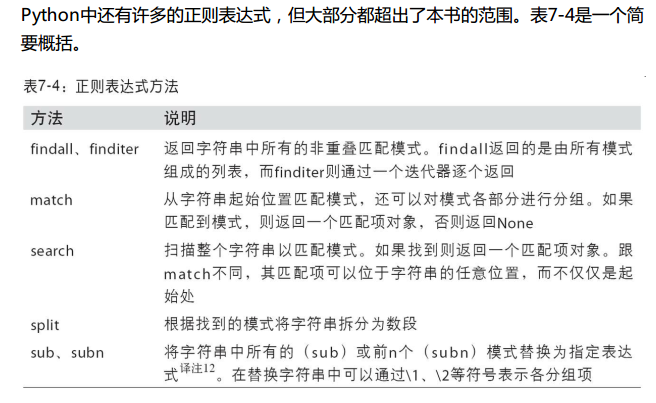

# pandas的矢量化字符串函数

- 通过data.map，所有字符串和正则表达式方法都能被应用于（传入lambda表达
式或其他函数）各个值，
- 但是如果存在NA（null）就会报错。
- 为了解决这个问题，Series有一些能够跳过NA值的面向数组方法，进行字符串操作。通过Series的str属性即可访问这些方法。

In [14]:
import pandas as pd
import numpy as np

data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)

In [15]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

- 也可以使用正则表达式，还可以加上任意re选项（IGNORECASE等）

In [23]:
res = data.str.findall(pattern,flags=re.IGNORECASE)
res

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [17]:
data.str.findall(pattern)

Dave      []
Rob       []
Steve     []
Wes      NaN
dtype: object

In [18]:
matchs = data.str.match(pattern,flags=re.IGNORECASE)
matchs

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

- 有两个办法可以实现矢量化的元素获取操作：要么使用str.get，要么在str属性上使
用索引

In [20]:
print(data)
data.str.get(1)

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object


Dave       a
Rob        o
Steve      t
Wes      NaN
dtype: object

In [21]:
data.str[0]

Dave       d
Rob        r
Steve      s
Wes      NaN
dtype: object

In [22]:
matchs.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [24]:
res.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [25]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

# pandas字符串方法

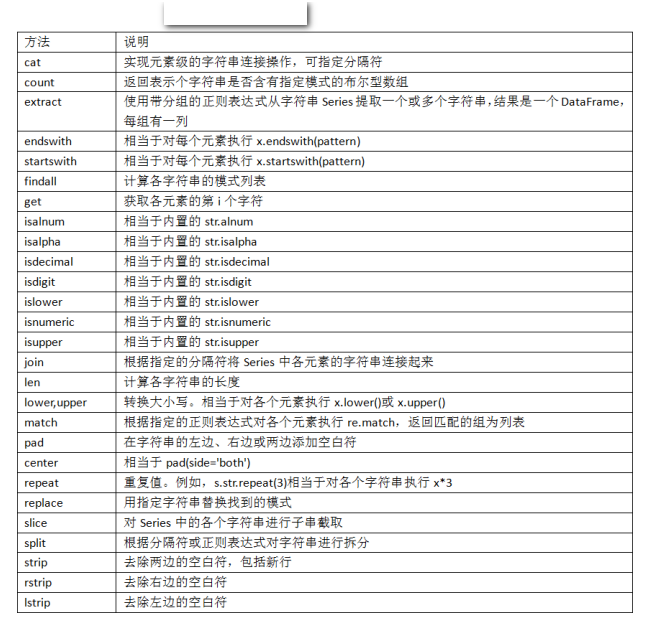